In [2]:
#import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#set working directory
os.chdir('C:/Users/siree/OneDrive/Desktop/WGU/D212/D212_files')

In [4]:
#getting working directory
cwd = os.getcwd()
print(cwd)

C:\Users\siree\OneDrive\Desktop\WGU\D212\D212_files


In [5]:
#load the dataset
df = pd.read_csv('churn_clean.csv')

In [ ]:
#### C3: prepare the data ######

In [77]:
#selecting continuous variables
continuous_vars = ['MonthlyCharge', 'Bandwidth_GB_Year']
df_selected = df[continuous_vars]

In [78]:
#Check for missing values
df_selected.isnull().sum()

MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64

In [79]:
#Standardie the continuous variables
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_selected)

In [80]:
#Converting to DataFrame
df_prepared = pd.DataFrame(df_standardized, columns=continuous_vars)

In [81]:
#extract CSV
df_prepared.to_csv('C:/Users/siree/OneDrive/Desktop/WGU/D212/TASK_1/SIREEN_SHABAN_D212_TASK1_clean_data.csv')

In [ ]:
#### D1: OUTPUT AND INTERMEDIATE CALCULATIONS #######

In [82]:
#Range of k values to test
k_values = range(1, 11)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_standardized)
    inertia_values.append(kmeans.inertia_)

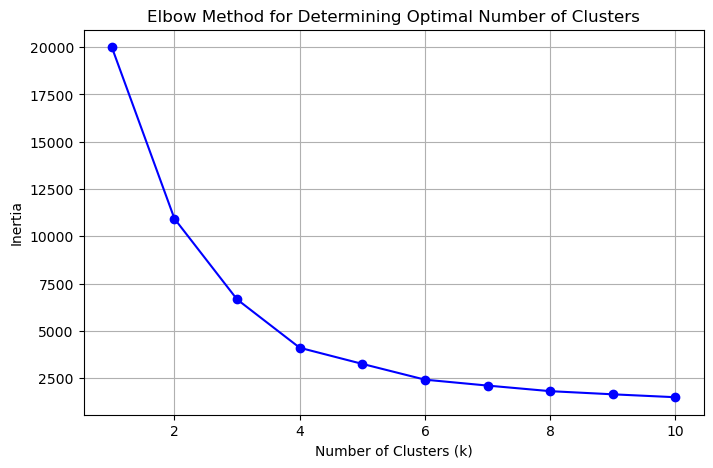

In [83]:
#Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [88]:
# Performing K-means clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(df_standardized)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [89]:
# Creating a DataFrame with the standardized data and cluster labels
df_plot = pd.DataFrame(df_standardized, columns=continuous_vars)
df_plot['Cluster'] = kmeans.labels_

In [90]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_standardized, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4878760152883964


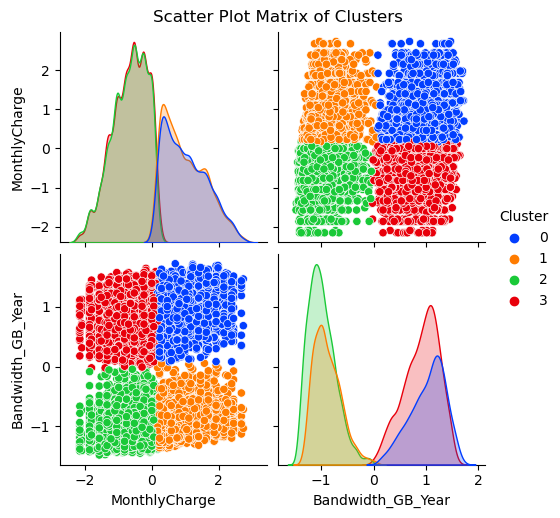

In [91]:
# Plotting the pairplot to visualize the data
sns.pairplot(df_plot, hue='Cluster', diag_kind='kde', palette='bright')
plt.suptitle('Scatter Plot Matrix of Clusters', y=1.02)
plt.show()